In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.integrate import odeint,quad
from scipy.stats import kde,beta
import seaborn as sns
%matplotlib inline
from importlib import reload
pi=np.pi

#mardi 31 mars 2020
#essayons tout d'abord d'écrire des fonctions qui calculent le rayon spectral
#et l'abcisse de convergence d'une matrice

from numpy import linalg as LA
from scipy.linalg import expm
from scipy.optimize import brentq


In [3]:
import ucovid
sns.set()

In [4]:
#reload(ucovid)
#ucovid.hesrog(beta=1,b=1,mu=1,r=1,eps=0.2)

 



In [5]:
#reload(ucovid)
#ucovid.lamvsp(beta=1.5,b=1,mu=0.9,r=1,epsmax=0.5)


In [6]:
#reload(ucovid)
#ucovid.phesrog(beta=1,b=1,mu=2,r=0.5,voir=True,eps=0.1)

Pour le modèle de Hessterbeek et Rogers
\begin{equation}
  \frac{dx}{dt} = A(t) x(t)\qquad 
  A(t)=\begin{pmatrix}-r & b/s(t)\\
\beta s(t) & -\mu\end{pmatrix}
\end{equation}
avec $s(t) = e^{\epsilon \sin(2\pi t)}$. $\lambda_d(E)$ est le rayon spectral de ma matrice de monodromie $E=\phi(1)$, et $P$ leur quantité qui vérifient bien 
\begin{equation}
 R_0 > 1 \iff \lambda_d(E) >1 \iff P >1\,.
\end{equation}
On voit que contrairement à leur affirmation/prédiction les indicateurs augmentent quand $\epsilon$ augmente. En outre on voit que l'augmentation est en $\epsilon^2$ pour $\epsilon$ petit.

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(ucovid.lamvsp,
         beta=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
                b=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
                  mu=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
r=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
                  epsmax=widgets.FloatSlider(min=0.0, max=0.5, step=0.01, value=0.2, continuous_update=False)
        )



interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='beta', max=2.0), FloatSlide…

<function ucovid.lamvsp(beta=1, b=1, mu=1, r=1, epsmax=0.5, vlam=False)>

In [8]:
#ucovid.hesrog(beta=2.0,b=1.0,mu=1,r=1,eps=0.0)

In [9]:
#ucovid.hesrog(beta=1,b=2.0,mu=1,r=1,eps=0.0)

In [10]:
#reload(ucovid)
#ucovid.blamvsp(vlam=True,epsmax=0.01)

In [11]:
#reload(ucovid)
#ucovid.bhesrog(eps=0.5,voir=True)

In [12]:
#reload(ucovid)
#ucovid.baphesrog(beta=1.2,eps=0.001,nbpts=1000,voir=True)

In [13]:
def testinfluencevecteurpropre():
    nbpts=200
    T=1
    eps=0.01
    tt=np.linspace(0,T,nbpts+1)
    stt=np.sin(2*pi*tt/T)
    x=np.exp(eps*stt)
    y=1+eps*stt
    z=1-0.001*stt
    print("epsilon=",eps,"moyennes xz, yz",(x*z).mean(),(y*z).mean()) #xz > 1 > yz
    eps=0.001
    x=np.exp(eps*stt)
    y=1+eps*stt
    z=1-0.001*stt
    print("epsilon=",eps,"moyennes xz, yz",(x*z).mean(),(y*z).mean()) #1> xz et 1 > yz
    plt.plot(tt,x,label=r"$e^{\epsilon*sin}$")
    plt.plot(tt,y,label=r"1+$\epsilon*sin$")
    plt.plot(tt,x*z)
    plt.legend()
#testinfluencevecteurpropre():

Mercredi 29 avril 2020. 

Essai de la dynamique proposée par Sylvain. On remplace $A(t)$ par
$$ B(t) =\begin{pmatrix}-r & b(1 + \delta \sin(2\pi t)\\
\beta(1-\delta \sin(2\pi t)) & -\mu\end{pmatrix}$$

avec comme paramètres typiques : $\beta=b=1.5$, $r=2$, $\mu=1$.
     

In [14]:
reload(ucovid)

<module 'ucovid' from '/home/philippe/pca/EPIDEMIE/ucovid.py'>

In [15]:
#ucovid.lamvsylvain()

In [16]:
interact(ucovid.lamvsylvain,
         beta=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.5, continuous_update=False),
                b=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.5, continuous_update=False),
                  mu=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
r=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=2.0, continuous_update=False),
                  deltamax=widgets.FloatSlider(min=0.0, max=0.5, step=0.01, value=0.2, continuous_update=False)
        )



interactive(children=(FloatSlider(value=1.5, continuous_update=False, description='beta', max=2.0), FloatSlide…

<function ucovid.lamvsylvain(beta=1.5, b=1.5, r=2, mu=1, deltamax=0.5)>

On voit que la l'indicateur $\lambda_d(E)$ décroît avec $\delta$ ( et en $\delta^2$ au voisinage de $0$)

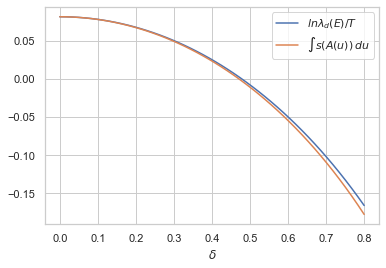

In [17]:
reload(ucovid)
#ucovid.bsylvainhess()
ucovid.blamvsylvain(T=10,deltamax=0.8)

### Jeudi 7 mai 2020
Let us check that our new threshold parameter MSA and its first order approximation yield the right variations of the spectral radius (and thus of $R_0$).

We consider a periodic epidemic model described by the ODE
\begin{equation}
  \frac{dx}{dt} = A(t)\, x(t)\,,
\end{equation}
with $A$a matrix valued continuous
$T$-periodic function. We shall consider small periodic perturbations
of the type
\begin{equation}
  A(t) = A_0 + \epsilon M(t),,
\end{equation}

Our first example illustrates the first order approximation
 \begin{equation}
   A_0 =
   \begin{pmatrix}
     -2 & 2 \\ 1 & -1
   \end{pmatrix}
\,,\quad  M(t) =(1 + \cos(2\pi t))\,\,
\begin{pmatrix}
  0& m_{12}\\ m_{21} & 0
\end{pmatrix}
 \end{equation}



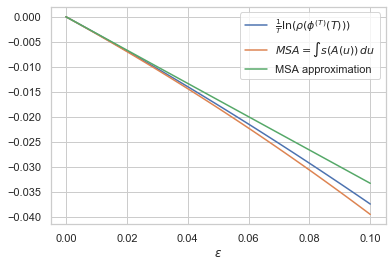

In [18]:
reload(ucovid)

ucovid.tex1(epsilonmax=0.1,m12=1,m21=-1,T=1)

In [19]:
interact(ucovid.tex1,
         m12=widgets.FloatSlider(min=-5.0, max=5.0, step=0.2, value=1.0, continuous_update=False),
                m21=widgets.FloatSlider(min=-5, max=5.0, step=0.2, value=1.0, continuous_update=False),
                  epsilonmax=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.5, continuous_update=False),
        T=widgets.IntSlider(min=1,max=100,step=1,value=1))


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='m12', max=5.0, min=-5.0, st…

<function ucovid.tex1(m12=1, m21=1, epsilonmax=0.5, T=1)>

pente approximation 1.0


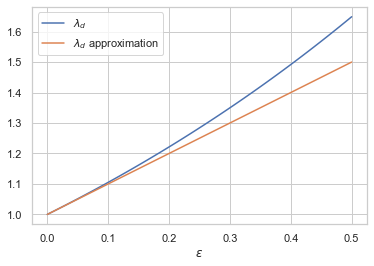

In [20]:
reload(ucovid)
ucovid.texlam1()

pente approximation -0.3333333333333333


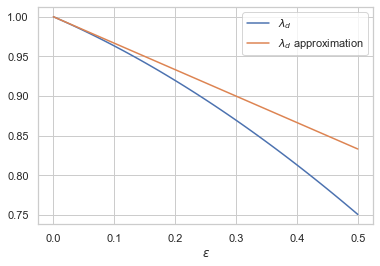

In [21]:
ucovid.texlam1(m21=-1)

In [22]:
ucovid.genex1approxlam(),ucovid.genex1approxlam(mdu=-1)

(1.0, -0.3333333333333333)

### Lundi 11 mai 2020
Let us check that our new threshold parameter MSA and its first order approximation yield the right variations of the spectral radius (and thus of $R_0$).

We consider a periodic epidemic model described by the ODE
\begin{equation}
  \frac{dx}{dt} = A(t)\, x(t)\,,
\end{equation}
with $A$a matrix valued continuous
$T$-periodic function. We shall consider small periodic perturbations
of the type
\begin{equation}
  A(t) = A_0 + \epsilon M(t),,
\end{equation}

Our  example illustrates the second order approximation
 \begin{equation}
   A_0 =
   \begin{pmatrix}
     -2 & 2 \\ 1 & -1
   \end{pmatrix}
\,,\quad  M(t) = \sin(2\pi t)\,\,
\begin{pmatrix}
  0& b_{12}\\ b_{21} & 0
\end{pmatrix}
 \end{equation}



Second ordre coefficient v0Bpi0Bu0 -0.4444444444444444


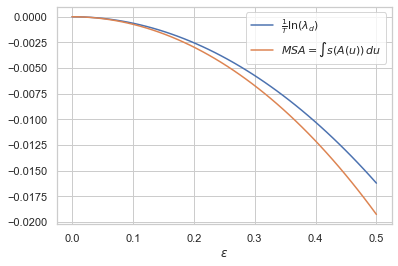

In [23]:
#exemple de Bacaer 2007
reload(ucovid)
ucovid.tex2(T=5,b12=0,b21=1)

Second ordre coefficient v0Bpi0Bu0 0.5555555555555589


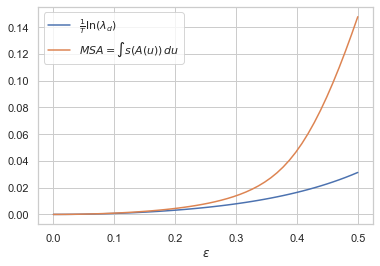

In [24]:
ucovid.tex2(T=4,b12=7,b21=2)

In [25]:
reload(ucovid)
interact(ucovid.tex2,
         b12=widgets.FloatSlider(min=-5.0, max=5.0, step=0.2, value=1.0, continuous_update=False),
                b21=widgets.FloatSlider(min=-5, max=5.0, step=0.05, value=1.0, continuous_update=False),
                  epsilonmax=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.5, continuous_update=False),
        T=widgets.IntSlider(min=1,max=100,step=1,value=1))

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='b12', max=5.0, min=-5.0, st…

<function ucovid.tex2(b12=2, b21=-1, epsilonmax=0.5, T=1)>

lambda= 0.9846585727597575 msa= -0.08630087207852469


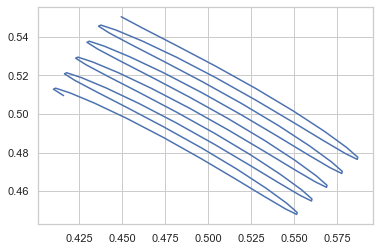

In [26]:
reload(ucovid)
l,m,x,xc1,xc2=ucovid.tex3(epsilon=0.5)
plt.plot(x[:,0],x[:,1])

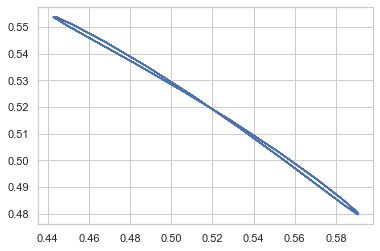

In [27]:
plt.plot(xc1,xc2)

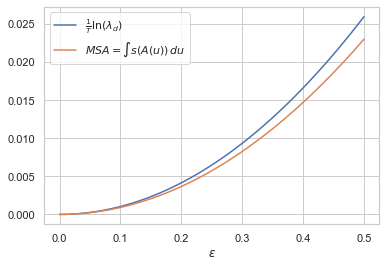

In [28]:
reload(ucovid)
ucovid.texah(T=5)

In [29]:
#obtenir la liste des modules utilises
import types

def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

list(imports())

['builtins',
 'builtins',
 'types',
 'numpy',
 'matplotlib.pyplot',
 'matplotlib.gridspec',
 'pandas',
 'scipy.stats.kde',
 'seaborn',
 'numpy.linalg',
 'ucovid',
 'ipywidgets',
 'ucovid']